<a href="http://esprit.tn"><img src = "https://upload.wikimedia.org/wikipedia/commons/f/ff/Logo_ESPRIT_Ariana.jpg" width = 300, align = "center"></a>



<h1 align=center><font size = 5>Lab 7: KDD-99 - EDA - Data Visualization </font></h1>

Estimated duration: 80 min

<br>

### Goals:

The Current lab aims is to apply **Exploratory data Analysis** using:
<li> Statistical tools provided by **Pandas**  </li>
<li> Visualization tools proposed by **Mathplotlib** and **Seaborn** </li>
<li> **Regression** analysis of the more representative features </li>


Benchmark Site:
    http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html

<h1 align=center><font size = 5>I. Loading data </font></h1>


<h4 align=center>I.1 Defining data sources</h4>

In [4]:
path = './kddcup.data_10_percent_corrected'
path_meta= './kddcup.names'
# path of the data set generation with header column names
path_new='./new_dataset.csv'  

<h4 align=center>I.2 Loading modules  and  Defining helpers functions </h4>

In [2]:
import datetime
import csv
import pandas as pnd


import matplotlib as plt
from matplotlib import pyplot as plt2
import numpy as np
import seaborn as sns

In [2]:

t=datetime.datetime.now()
print(datetime.datetime.now()- t)

def init_chrono():
    return datetime.datetime.now()

def elapsed_time(t):
    if t:
        delta = init_chrono() - t
        print ('Elapsed time', delta)
        return delta 
    
# test
t = init_chrono()
elapsed_time(t)

0:00:00.000042
Elapsed time 0:00:00.000028


datetime.timedelta(microseconds=28)

**-1-** Load the dataset with pandas:

In [55]:
t = init_chrono()
#insert your code here
df_new = pnd.read_csv(path, header=None)
dataset = df_new
with open(path_meta,"r") as file1:
    FileContent_meta=file1.readlines()
    
lst= list(map(lambda x: x.split(':')[0], FileContent_meta[1:]))
print(lst)
lst.append('class')
dataset.columns= lst
elapsed_time(t)

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
Elapsed time 0:00:02.604615


datetime.timedelta(seconds=2, microseconds=604615)

**Question : ** print the last 10 lines. Are colunm names loaded correctly?

In [9]:
#insert your code here

df_new.tail(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
494010,0,tcp,http,SF,308,662,0,0,0,0,...,255,1.0,0.0,0.03,0.06,0.00,0.01,0.0,0.0,normal.
494011,0,tcp,http,SF,291,1862,0,0,0,0,...,255,1.0,0.0,0.02,0.05,0.00,0.01,0.0,0.0,normal.
494012,0,tcp,http,SF,289,244,0,0,0,0,...,255,1.0,0.0,0.02,0.05,0.00,0.01,0.0,0.0,normal.
494013,0,tcp,http,SF,306,662,0,0,0,0,...,255,1.0,0.0,0.02,0.05,0.00,0.01,0.0,0.0,normal.
494014,0,tcp,http,SF,289,1862,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.


In [7]:
yes the headers are correct

SyntaxError: invalid syntax (<ipython-input-7-a584fa00cd8f>, line 1)

** Exercice 1: ** 

    -(1). List column types.
    -(2). Use duplicated() method of the dataframe class to indentify redundant records.
    -(3). Check the type of the returned values.
    -(4). Print some returned values.
    -(5). Compute the tolal number of duplicated records.

    

In [12]:
#Insert your code here
print(type(df_new))
#print(df_new.dtypes)
#print(type(dup_ds))
#print(dup_ds.dtypes)
#print(dup_ds.shape)

            

<class 'pandas.core.frame.DataFrame'>


In [63]:
unique_rows_df = dataset.drop_duplicates()

In [56]:
dataset[dataset.isnull() == True].shape

(494021, 42)

In [61]:
dataset[dataset.duplicated() == False].shape
#End

(145586, 42)

## II. data Viz. Basics

To be able to embed graphic visualization on the same notebook use the **inline** backend with the following ***magic function***.

In [64]:
%matplotlib inline
#%matplotlib widget


**-1** Run the 2  following blocks of code

In [65]:
import numpy as np 

(array([  1.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,
          0.,   2.,   4.,   6.,   6.,   5.,  11.,   8.,  19.,  16.,  22.,
         27.,  33.,  44.,  42.,  54.,  61.,  64.,  75.,  96., 113., 109.,
        131., 144., 150., 184., 177., 234., 214., 237., 223., 288., 286.,
        259., 282., 303., 301., 300., 305., 310., 346., 333., 286., 318.,
        298., 293., 262., 259., 252., 240., 223., 191., 186., 159., 160.,
        124., 139.,  96., 105.,  72.,  79.,  56.,  51.,  58.,  45.,  42.,
         30.,  23.,  28.,  19.,  17.,   7.,  13.,  13.,   2.,   5.,   4.,
          6.,   5.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          2.]),
 array([-4.0696178 , -3.98881588, -3.90801397, -3.82721205, -3.74641013,
        -3.66560821, -3.5848063 , -3.50400438, -3.42320246, -3.34240054,
        -3.26159863, -3.18079671, -3.09999479, -3.01919287, -2.93839096,
        -2.85758904, -2.77678712, -2.6959852 , -2.61518329, -2.53438137,
        -2.45357945, -2.37

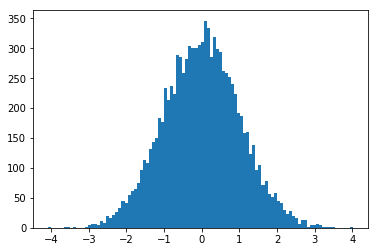

In [67]:
x= np.random.randn(10000)
plt2.hist(x,100)

**2-** The following code will plot the number of files accessed for every record in a sequential way 

<class 'pandas.core.frame.DataFrame'>


num_compromised       767
service            telnet
Name: 41718, dtype: object

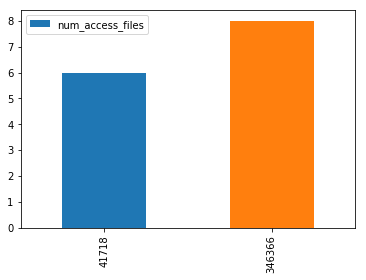

In [94]:
dataset[dataset.num_access_files > 5].num_access_files.plot(kind='bar', legend= True)
dataset.loc[41718, ['num_compromised','service']]

**-3-** Similarly plot the number of root accesses

Text(0.5, 1.0, ':)')

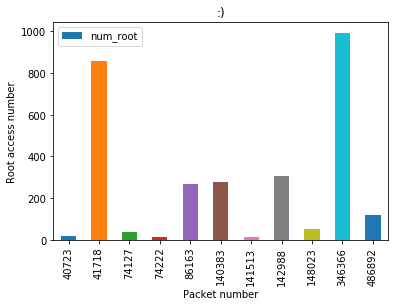

In [95]:
# insert your code here
dp = dataset[dataset.num_root >= 10].num_root.plot(kind='bar', legend=True, title="Root access")
dp.set_xlabel("Packet number")
dp.set_ylabel("Root access number")


**-4-** Add a title to the above chart

**-5-** Add titles to both chart dimensions (axes)

** Exercice 2: **
    
    - Plot the number of files created 
    - Add legend and titles
    - Compare the number of files created chart to the root access count chart. 
    What can you conclude? Extract meaningful insights from the charts.

In [ ]:
# insert your code here
dfc = dataset.num_file_creations.plot(kind='line', title='Files created', legend=True, logy=True)
dfc.set_xlabel("files")
dfc.set_ylabel("number")
# insert your code here
dp = dataset.root_shell.plot(kind='line', legend=True, title="Root access", x='num_root', y='num_file_creations')

** Exercice 3: **
    
    Using the stats and the code of the duplicated records plot the distribution of 
    duplicated and unique KDD benchmark records
    - Add legend adn titles
    - Suggest another charting type 

([<matplotlib.patches.Wedge at 0x7f17d9908f60>,
 [Text(-0.6613060779677389, 0.8790189254179497, 'Duplicate'),
  Text(0.6613060779677391, -0.8790189254179495, 'Unique')])

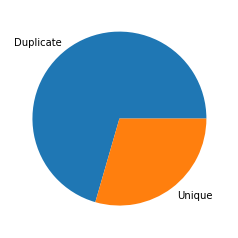

In [17]:
dup_ds = dataset[dataset.duplicated(keep="first")]
unique_s = dataset[dataset.duplicated(keep="first") == False]
plt.pyplot.pie([dup_ds.shape[0], unique_s.shape[0]], labels=['Duplicate', 'Unique'])

** Exercice 4: **
    
    Using the class column of the KDD benchmark:
        -compute the frequency of available values.
        - Which charting type is more suitable for such type of data
        - plot the data 
        - add titles and legends
        - plot in a separate chart the frequencies of each type of attack 
        - save chart using savefig() method

Text(0, 0.5, 'frequency')

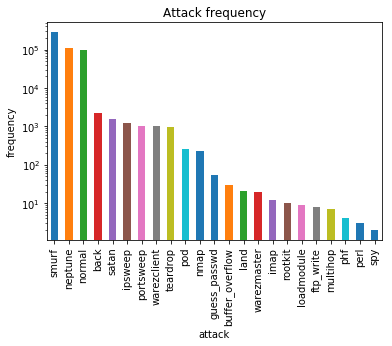

In [101]:
# insert your code here
dataset_new = pnd.read_csv("./new_dataset.csv")
dataset_new['class'] = dataset_new['class'].map(lambda x: x[:-1])
p = dataset_new['class'].value_counts().plot(kind='bar', title="Attack frequency", logy=True)
p.set_xlabel('attack')
p.set_ylabel('frequency')

In [ ]:
# insert your code here

In [1]:
** Exercice 5: **
    
    -°Plot a chart illustrating connections duration 
    - Use a histogram to plot the same column
    - What can you conclude?
    - Using python ducmentation (help function) use bin parameter to fine tune the histogram chart.
    - plot the same chart for records having 'normal' behavior and  a plot attack records.
    - use groupby() and pivot() methods to plot a heatmap of the mean duration of attacks. 


SyntaxError: invalid syntax (<ipython-input-1-f1eac0e311b9>, line 1)

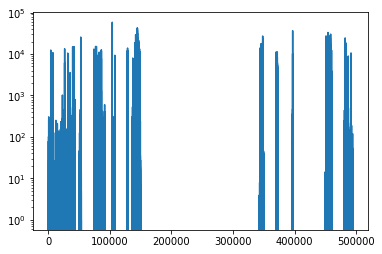

In [104]:
dataset_new.duration.plot(kind='line', logy=True)

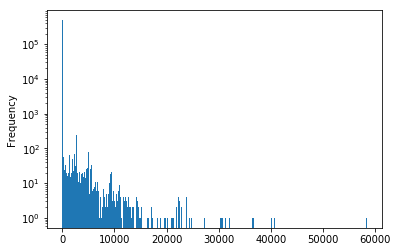

In [114]:
dataset_new['duration'].plot(kind='hist', logy=True, bins=1000)


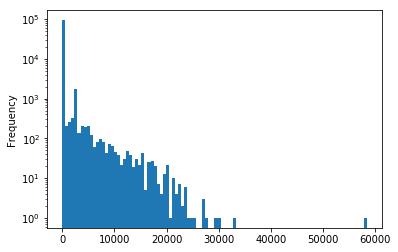

In [117]:
dataset_new[dataset_new['class'] == 'normal']['duration'].plot(kind='hist', logy=True, bins=100)


In [21]:
print("duration is not 0: {} ".format(dataset_new[dataset_new['duration'] > 0]['duration'].count()))
print("duration is 0 : {}" .format(dataset_new[dataset_new['duration'] == 0]['duration'].count()))
#Conclusion: the distribution is not evenly distributed, 0 duration count is so much bigger than >0 duration count

duration is not 0: 12350 
duration is 0 : 481671


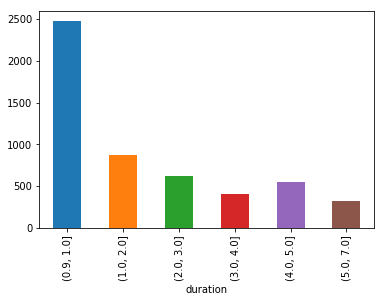

In [22]:
bins = [0.9, 1, 2, 3, 4, 5, 7]
df = dataset_new.groupby(pnd.cut(dataset_new['duration'], bins=bins)).duration.count()
df.plot(kind='bar')

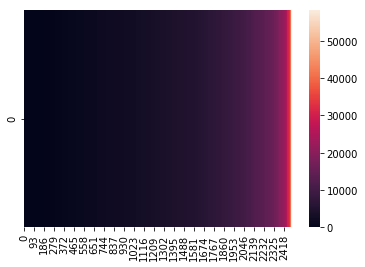

In [119]:
date_array = dataset_new.groupby(['duration'])['duration'].mean()
sns.heatmap([date_array[:]])


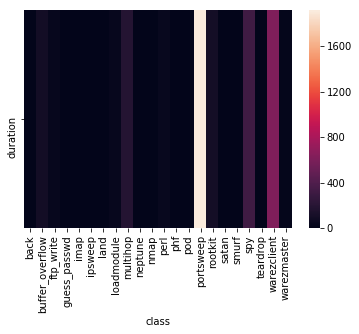

In [155]:
piv = pnd.pivot_table(dataset_new[dataset_new['class'] != 'normal'], values='duration', columns=['class'], fill_value=0)
sns.heatmap(piv)

 <hr>
Copyright &copy; Oct-2018 Dr.Amir Esseghir

In [4]:
print(plt.plot.__doc__)

AttributeError: module 'matplotlib' has no attribute 'plot'